# 1. Entropy Normalization 

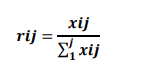

In [1]:
import pandas as pd
import numpy as np

class MultiCriteria():
    def __init__(self,database):
        self.database=database
    
    def normalize(self):
        entropy_database= pd.DataFrame(data=self.database)
        list_entropy=[]
        for i in self.database:
            #sum_columns0=sum(self.database[i])
            entropy_database[i]= (self.database[i])/sum(self.database[i])
            list_entropy.append(entropy_database[i])
            result_entropy=pd.DataFrame(list_entropy)
            result_entropy=np.transpose(result_entropy)
        return result_entropy

# 2. Entropy Weighted

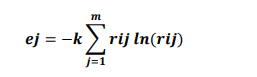
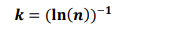
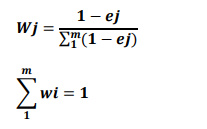

In [2]:
  def weighted_entropy(self):        
        #Step 4: Weight with entropy
        normalize= MultiCriteria.normalize(self)
        normalize_df= pd.DataFrame(data=normalize)
        entropy_dataset=(np.log(normalize_df)*normalize_df).sum(axis=0)
        entropy_dataset=((-1)/(np.log(len(normalize_df))))*entropy_dataset
        entropy_dataset=1-entropy_dataset
        entropy_dataset=entropy_dataset/sum(entropy_dataset)
        entropy_dataset=entropy_dataset.T
        return entropy_dataset

# 3. Min and Max Value in Maut

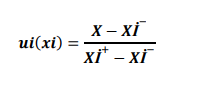

In [3]:
def highlow(self):
        high_database= MultiCriteria.normalize(self)
        list_highlow_i=[]
        list_highlow_j=[]
        for i in ('ODEME_PLANI_KODU','NET_ALIM_MIKTARI','INDIRIM'):#en yüksek olması gerekir
            high_database[i]= ((self.database[i])-min(self.database[i]))/(max(self.database[i])-min(self.database[i]))
            list_highlow_i.append(high_database[i])
            result_highlow_i=pd.DataFrame(list_highlow_i)
            result_highlow_i=np.transpose(result_highlow_i)
        for j in ('BIRIM_FIYAT', 'KDV_ORANI', 'KDV', 'TUTAR'):
            high_database[j]= ((self.database[j])-max(self.database[j]))/(min(self.database[j])-max(self.database[j]))
            list_highlow_j.append(high_database[j])
            result_highlow_j=pd.DataFrame(list_highlow_j)
            result_highlow_j=np.transpose(result_highlow_j)
        result_highlow=pd.concat([result_highlow_i,result_highlow_j],axis=1)
        return result_highlow        

# 4. Result Score of Maut 

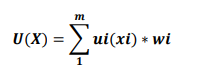

In [4]:
def score(self):
        highlow=MultiCriteria.highlow(self)
        weighted_ent=MultiCriteria.weighted_entropy(self)
        list_score=[]
        for i in highlow:
            score_result=highlow[i]*weighted_ent[i]
            list_score.append(score_result)
            result_score=pd.DataFrame(list_score)
            result_score=np.transpose(result_score)
            score_result= result_score.sum(axis=1)
            
        return score_result